In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(inp, title=None):
    inp = torchvision.utils.make_grid(inp)
    """Imshow for Tensor."""
    plt.figure(figsize=(14,6))
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# # Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# # Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])

In [63]:
import pandas as pd
import numpy as np

from dataset import get_dataset
from trainer import Trainer

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import torchvision
from utils import imshow

In [9]:
df_train = pd.read_csv('df_train.csv')
df_valid = pd.read_csv('df_valid.csv')
df_test = pd.read_csv('/opt/ml/input/data/eval/info.csv')
train_dataset, valid_dataset, test_dataset = get_dataset(df_train, df_valid, df_test)

In [10]:
## hyperparameters
lr = 0.0003
batch_size = 16
num_epoch = 20

In [34]:
## prepare Dataloader

dataloaders = {'train' : DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True),
               'valid' : DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)}
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)

In [91]:
device = 'cuda'
model = models.resnet18()
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))
model.to(device)
model.load_state_dict(torch.load('/opt/ml/code/save/label/single_8899.pt'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
labels = []

for mask in ['Wear', 'Incorrect', 'Not Wear']:
    for gender in ['Male', 'Female']:
        for age in ['Age < 30', '30 <= Age < 60', '60 <= Age']:
            labels.append(f'Mask:{mask}, Gender:{gender}, {age}')

In [84]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

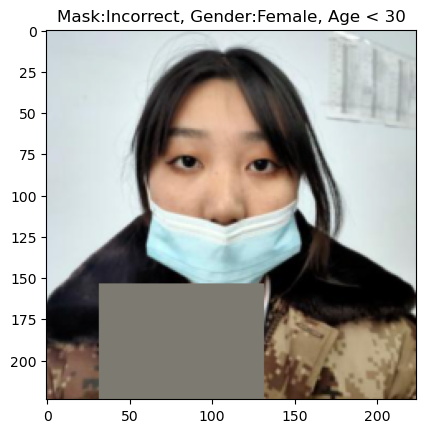

In [161]:
inputs = train_dataset[np.random.randint(0, len(train_dataset)-1)][0].unsqueeze(0)

with torch.no_grad():
    inputs = inputs.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
        
imshow(inputs.squeeze(0).cpu(), title=labels[preds.item()])
plt.show()